In [1]:
# Gerekli paketleri alalim
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt


In [3]:
# Datalarimizi alip inceleyelim
df1=pd.read_csv('column_2C_weka.csv')
df2=pd.read_csv('column_3C_weka.csv')

In [4]:
df1.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [5]:
#EKSİK VERİMİZ VARMI DİYE  KONTROL ETTİK 

In [6]:
df1.pelvic_incidence.value_counts()
df1.sacral_slope.values
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [7]:
x=df1.iloc[:,0].values.reshape(-1,1)

y=df1.iloc[:,3].values.reshape(-1,1)


In [8]:
#SCATTER PLOT

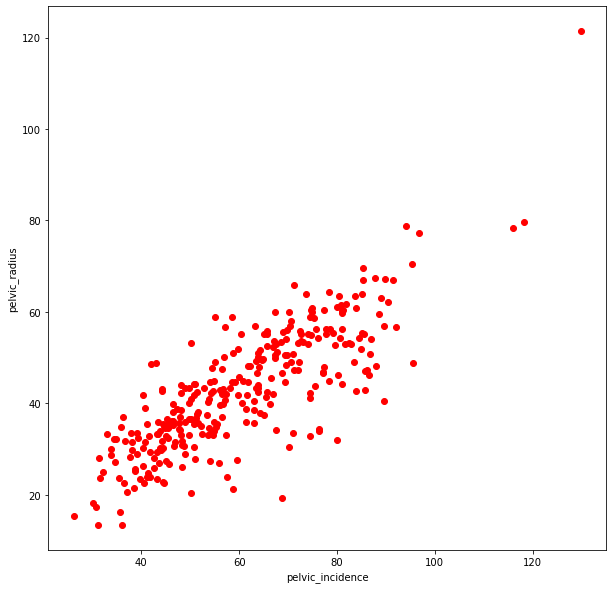

In [9]:
plt.figure(figsize=(10,10))
plt.scatter(x,y,color='red')
plt.xlabel('pelvic_incidence')
plt.ylabel('pelvic_radius')
plt.show()

In [10]:
#linear regression modelimizi uygulayalım

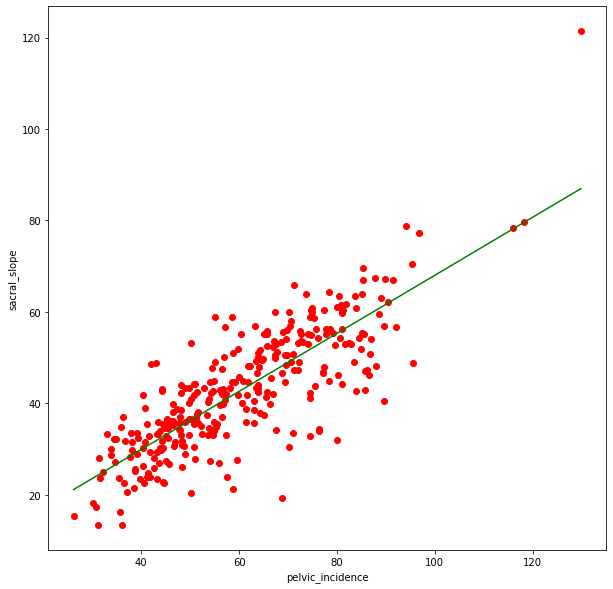

[[22.64690722]]


In [11]:
from sklearn.linear_model import LinearRegression
linear_reg1=LinearRegression()
linear_reg1.fit(x,y)

b0=linear_reg1.predict([[0]])
b1=linear_reg1.coef_

x_=np.arange(min(x),max(x),0.01).reshape(-1,1)
y_head=linear_reg1.predict(x_).reshape(-1,1)

plt.figure(figsize=(10,10))
plt.scatter(x,y,color='red')
plt.plot(x_,y_head,color='green')
plt.xlabel('pelvic_incidence')
plt.ylabel('sacral_slope')
plt.show()

print(linear_reg1.predict([[28.5]]))

In [12]:
from sklearn.metrics import r2_score

print('r2_score:',r2_score(x_,y_head))

r2_score: 0.22722285721237456


In [13]:
df2.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


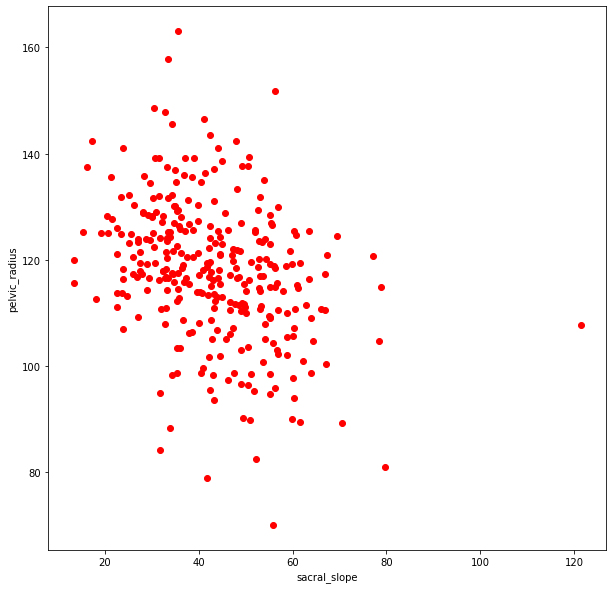

In [14]:
x2=df2.sacral_slope.values.reshape(-1,1)
y2=df2.pelvic_radius.values.reshape(-1,1)
plt.figure(figsize=(10,10))
plt.scatter(x2,y2,color='red')
plt.xlabel('sacral_slope')
plt.ylabel('pelvic_radius')
plt.show()

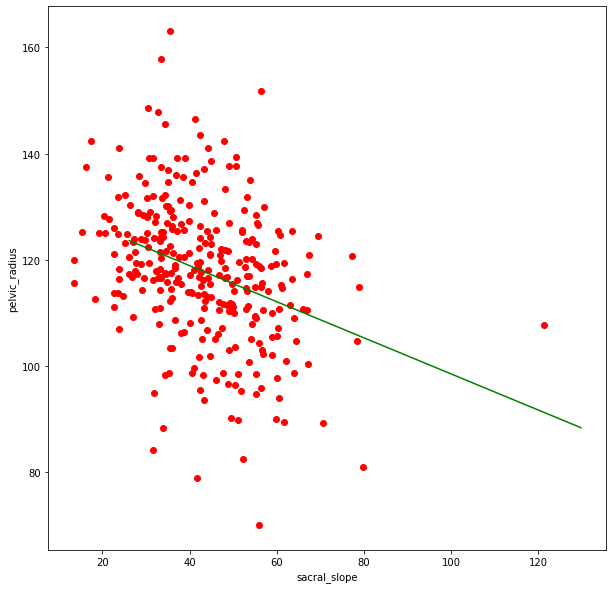

array([[122.82677126]])

In [15]:
lr=LinearRegression()
lr.fit(x2,y2)

b0=lr.predict([[0]])
b1=lr.coef_

x_2=np.arange(min(x),max(x),0.01).reshape(-1,1)
y_2head=lr.predict(x_2)

plt.figure(figsize=(10,10))
plt.scatter(x2,y2,color='red')
plt.plot(x_2,y_2head,color='green')
plt.xlabel('sacral_slope')
plt.ylabel('pelvic_radius')
plt.show()
lr.predict([[28.5]])

In [16]:
print(r2_score(x_2,y_2head))

-1.6716772339762267


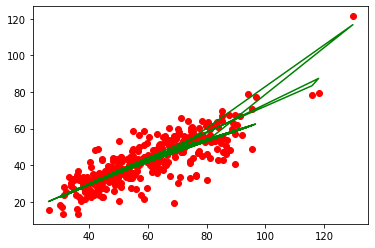

In [17]:
x3=df1.iloc[:,0].values.reshape(-1,1)
y3=df1.iloc[:,3].values.reshape(-1,1)


from sklearn.preprocessing import PolynomialFeatures
p_lr=PolynomialFeatures(degree=4)

x_poly=p_lr.fit_transform(x3)
lr=LinearRegression()
lr.fit(x_poly,y3)

y_head4=lr.predict(x_poly)
plt.scatter(x3,y3,color='red')
plt.plot(x3,y_head4,color='green')
plt.show()


In [18]:
lr.predict([[28]])

array([[122.99648807]])